In [2]:
import pandas 
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn
import numpy

In [3]:
data = pandas.read_csv('../train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


**Lọc các cột cần để xây dựng mô hình vào một dataframe mới**

In [4]:
data_train = data[['LotArea', 'YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd','SalePrice']]
data_train

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,8450,2003,856,854,2,3,8,208500
1,9600,1976,1262,0,2,3,6,181500
2,11250,2001,920,866,2,3,6,223500
3,9550,1915,961,756,1,3,7,140000
4,14260,2000,1145,1053,2,4,9,250000
...,...,...,...,...,...,...,...,...
1455,7917,1999,953,694,2,3,7,175000
1456,13175,1978,2073,0,2,3,7,210000
1457,9042,1941,1188,1152,2,4,9,266500
1458,9717,1950,1078,0,1,2,5,142125


**Kiểm tra dữ liệu**

In [5]:
data_train.isna().sum()

LotArea         0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

**Thống kê dữ liệu**

In [6]:
data_train.describe().round(2)

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,10516.83,1971.27,1162.63,346.99,1.57,2.87,6.52,180921.2
std,9981.26,30.20,386.59,436.53,0.55,0.82,1.63,79442.5
min,1300.00,1872.00,334.00,0.00,0.00,0.00,2.00,34900.0
25%,7553.50,1954.00,882.00,0.00,1.00,2.00,5.00,129975.0
50%,9478.50,1973.00,1087.00,0.00,2.00,3.00,6.00,163000.0
75%,11601.50,2000.00,1391.25,728.00,2.00,3.00,7.00,214000.0
max,215245.00,2010.00,4692.00,2065.00,3.00,8.00,14.00,755000.0


**Kiểm tra outliers**

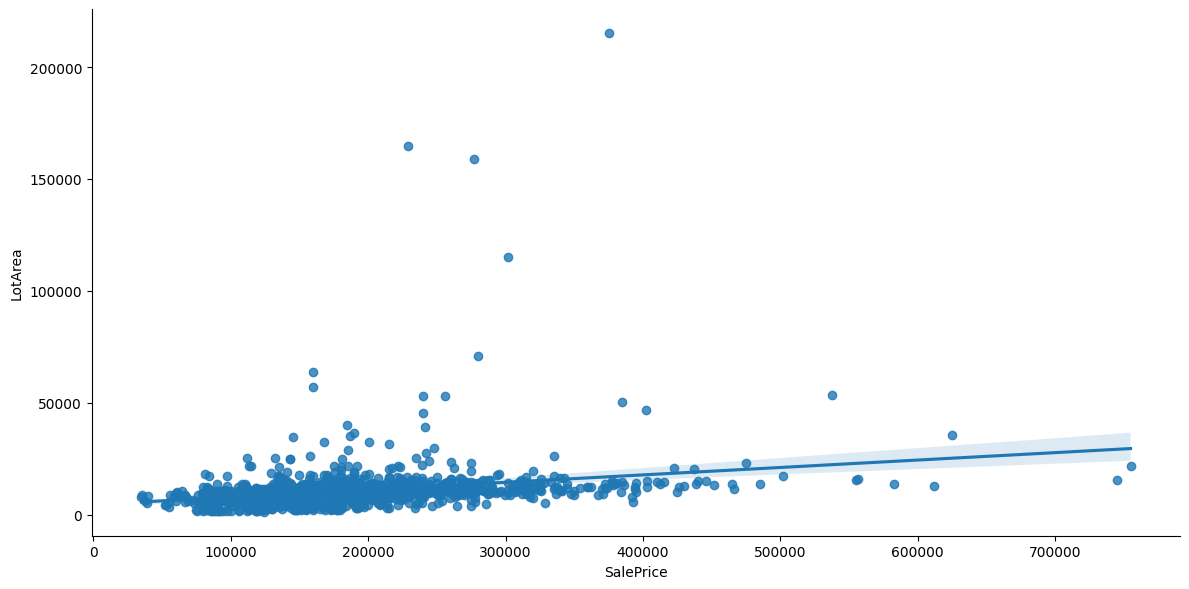

In [7]:
seaborn.lmplot(x = 'SalePrice',y='LotArea', data=data_train,aspect=2, height=6)
plt.show()

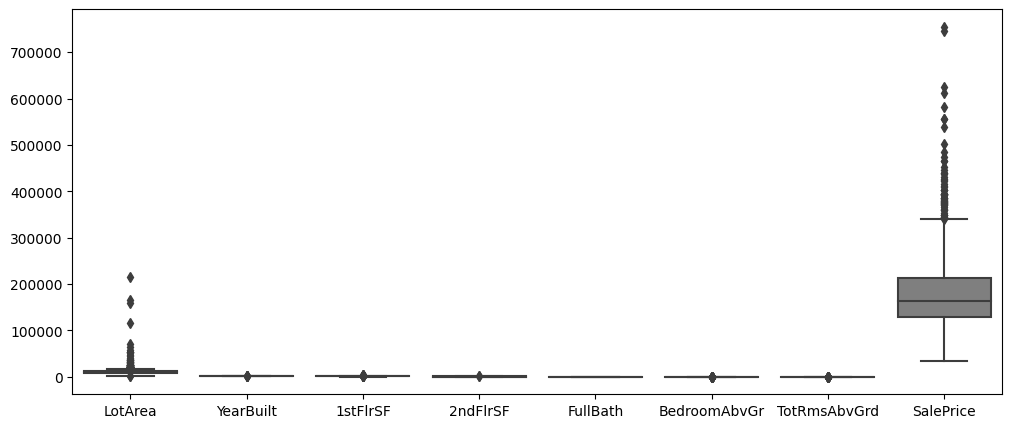

In [8]:
plt.figure(figsize=(12, 5))
seaborn.boxplot(data_train)
plt.show()

**Xây dựng tìm outliers**

In [9]:
def find_outliers_IQR(data):
   q1=data.quantile(0.25)
   q3=data.quantile(0.75)
   IQR=q3-q1
   outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
   return outliers

**Tìm outliers cho SalePrice**

In [10]:
sale_price_outliers = find_outliers_IQR(data_train['SalePrice'])
sale_price_outliers.count()

61

Outliers của SalePrice khá nhiều, loại bỏ hết các outliers sẽ làm sai lệch dữ liệu

Dựa vào biểu đồ lmpot phía trên, ta sẽ chia bin hợp lý cho SalePrice

**Chia bin cột SalePrice**

In [11]:
cut_labels = ['Low','Medium','High','Outliers']
cut_bins = [0,150000,250000,400000, data_train['SalePrice'].max()]
data_train['SalePrice'] = pandas.cut(data_train['SalePrice'], bins=cut_bins, labels=cut_labels)


C:\Users\Duy Long\AppData\Local\Temp\ipykernel_13448\3738802920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['SalePrice'] = pandas.cut(data_train['SalePrice'], bins=cut_bins, labels=cut_labels)


In [12]:
data_train

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,8450,2003,856,854,2,3,8,Medium
1,9600,1976,1262,0,2,3,6,Medium
2,11250,2001,920,866,2,3,6,Medium
3,9550,1915,961,756,1,3,7,Low
4,14260,2000,1145,1053,2,4,9,Medium
...,...,...,...,...,...,...,...,...
1455,7917,1999,953,694,2,3,7,Medium
1456,13175,1978,2073,0,2,3,7,Medium
1457,9042,1941,1188,1152,2,4,9,High
1458,9717,1950,1078,0,1,2,5,Low


In [13]:
print(data_train['SalePrice'][(data_train['SalePrice'] == 'Low')].count())
print(data_train['SalePrice'][(data_train['SalePrice'] == 'Medium')].count())
print(data_train['SalePrice'][(data_train['SalePrice'] == 'High')].count())
print(data_train['SalePrice'][(data_train['SalePrice'] == 'Outliers')].count())

619
624
189
28


**Xây dựng mô hình**

In [14]:
y = data_train['SalePrice']
X = data_train[["LotArea" ,"YearBuilt" ,"1stFlrSF" ,"2ndFlrSF" ,"FullBath" ,"BedroomAbvGr" ,"TotRmsAbvGrd"]]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [16]:
print('Số giá trị trong từng bộ dữ liệu')
print('X_train: ', numpy.shape(X_train))
print('y_train: ', numpy.shape(y_train))
print('X_test: ', numpy.shape(X_test))
print('y_test: ', numpy.shape(y_test))

Số giá trị trong từng bộ dữ liệu
X_train:  (1168, 7)
y_train:  (1168,)
X_test:  (292, 7)
y_test:  (292,)


In [17]:
model = tree.DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
predicts = model.predict(X_test)
print(predicts[:5])
print(y_test[:5])

['Medium' 'Low' 'Low' 'Low' 'Low']
258     Medium
267     Medium
288        Low
649        Low
1233       Low
Name: SalePrice, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Outliers']


**Đánh giá mô hình**

In [19]:
print(accuracy_score(y_test, predicts))
print(confusion_matrix(y_test, predicts))
print(classification_report(y_test, predicts))

0.8082191780821918
[[ 29   0   6   1]
 [  0 119  14   0]
 [  8  25  85   0]
 [  2   0   0   3]]
              precision    recall  f1-score   support

        High       0.74      0.81      0.77        36
         Low       0.83      0.89      0.86       133
      Medium       0.81      0.72      0.76       118
    Outliers       0.75      0.60      0.67         5

    accuracy                           0.81       292
   macro avg       0.78      0.76      0.77       292
weighted avg       0.81      0.81      0.81       292



**So sánh kết quả dự đoán và thực tế**

In [20]:
SalePrice_test = pandas.DataFrame(y_test)
SalePrice_test.reset_index(drop=True, inplace=True)
SalePrice_test.head()

,SalePrice
0,Medium
1,Medium
2,Low
3,Low
4,Low


In [21]:
SalePrice_predicted = pandas.DataFrame(predicts, columns=['Predicted SalePrice'])
SalePrice_predicted.head()

,Predicted SalePrice
0,Medium
1,Low
2,Low
3,Low
4,Low


In [22]:
SalePrice_comparing = pandas.concat([SalePrice_test, SalePrice_predicted], axis=1)
SalePrice_comparing

,SalePrice,Predicted SalePrice
0,Medium,Medium
1,Medium,Low
2,Low,Low
3,Low,Low
4,Low,Low
...,...,...
287,Low,Low
288,Medium,Medium
289,Low,Low
290,Low,Low


**Vẽ mô hình cây quyết định**

In [28]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image
import os

# os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [24]:
target=data_train['SalePrice'].unique()
feature = ["LotArea" ,"YearBuilt" ,"1stFlrSF" ,"2ndFlrSF" ,"FullBath" ,"BedroomAbvGr" ,"TotRmsAbvGrd"]

In [31]:
# Tạo file dot từ cây quyết định
dot_data = export_graphviz(model, out_file=None, feature_names=feature, class_names=target, filled=True, rounded=True, special_characters=True)

# Chuyển file dot thành đối tượng graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Hiển thị cây quyết định
Image(graph.create_png())

In [30]:
graph.write_png('tree_bai2.png')

True